# Sign Language Recognition - Applied to Libras (Brazilian Sign Language)
<img src=../images/LIBRAS.png />

# 1 - Install Libs

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib pandas numpy pyarrow fastparquet xgboost

# 2 - MediaPipe - Live Draw
## <a href=https://google.github.io/mediapipe>Link to access MediaPipe Documentation</a>
<p>
<img src=../images/hand_tracking_3d_android_gpu.gif width="15%"/>
<img src=../images/hand_landmarks.png width="81%" />
</p>

# 3 - Define MediaPipe Model to detection of Face, Pose and Hands

In [2]:
# Import Lib's

import os
import mediapipe as mp
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uuid

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [4]:
def mediapipe_detection(image, model):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    
    return image, results

# 4 - Define function to draw landmarks

In [5]:
def draw_landmarks(image, results):
    
    # Draw face connections
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
        landmark_drawing_spec=None
    )

    # Draw pose connections
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing_styles.get_default_pose_landmarks_style()
    )

    # Draw left hand connections
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style()
    )

    # Draw right hand connections  
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style()
    )


# 5 - MediaPipe Detection - Test

In [166]:
capture= cv2.VideoCapture(0)
#out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10,(640,480))

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, enable_segmentation=True) as holistic:
    
    while capture.isOpened():

        # Read image
        success, frame = capture.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        #out.write(image)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    capture.release()
    #out.release()
    cv2.destroyAllWindows()

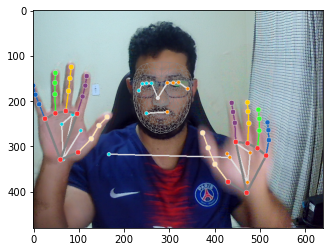

In [167]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 6 - Number of landmarks for each model (Face, Pose, Hands)

In [168]:
print("Face Detection - Landmarks", len(results.face_landmarks.landmark))
print("Pose Detection - Landmarks", len(results.pose_landmarks.landmark))
print("Hands Detection (Left) - Landmarks", len(results.left_hand_landmarks.landmark))
print("Hands Detection (Right) - Landmarks", len(results.right_hand_landmarks.landmark))

Face Detection - Landmarks 468
Pose Detection - Landmarks 33
Hands Detection (Left) - Landmarks 21
Hands Detection (Right) - Landmarks 21


## 6.1 - Check Landmarks values

In [169]:
print("Face Detection - Landmarks values:\n", results.face_landmarks.landmark[0])
print("Pose Detection - Landmarks values:\n", results.pose_landmarks.landmark[0])
print("Hands Detection (Left) - Landmarks values:\n", results.left_hand_landmarks.landmark[0])
print("Hands Detection (Right) - Landmarks values:\n", results.right_hand_landmarks.landmark[0])

Face Detection - Landmarks values:
 x: 0.4407331943511963
y: 0.4656032919883728
z: -0.019603336229920387

Pose Detection - Landmarks values:
 x: 0.4297451376914978
y: 0.4040774405002594
z: -0.8548291325569153
visibility: 0.9999971389770508

Hands Detection (Left) - Landmarks values:
 x: 0.7372779250144958
y: 0.8376389741897583
z: 0.0

Hands Detection (Right) - Landmarks values:
 x: 0.09515387564897537
y: 0.6862020492553711
z: 0.0



# 7 - Capture Image and save landmark values

In [89]:
sign_list = ['Obrigado', 'Oi', 'Bom dia']
sign_dict = {sign: num for num, sign in enumerate(sign_list)}  # Sign list to recoginize

number_of_videos = 5
number_of_frames = 30

In [92]:
landmarks_list = []
label_list = []

capture = cv2.VideoCapture(0)
output = cv2.VideoWriter('../videos/data_capture.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10,(640,480))

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for sign in sign_list:

        for video_number in range(number_of_videos):

            landmarks_list_of_each_frame = []

            for frame_number in range(number_of_frames):

                # Read image
                success, frame = capture.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_landmarks(image, results)

                # Monitoring the number of captured images
                if frame_number == 0:

                    cv2.putText(image, f'Capturing - Sign: {sign}', (120,200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Capturing - Sign: {sign} - Image Number: {video_number}', (15,12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Capture', image)
                    cv2.waitKey(500)

                else:

                    cv2.putText(image, f'Capturing - Sign: {sign} - Image Number: {video_number}', (15,12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Capture', image)

                # If landmark not exists, fill with zeros
                pose = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
                face = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
                left_hand = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                right_hand = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

                landmarks = np.concatenate([pose, face, left_hand, right_hand])

                landmarks_list_of_each_frame.append(landmarks)

                output.write(image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            landmarks_list.append(landmarks_list_of_each_frame)
            label_list.append(sign_dict[sign])
            #np.save(f'../data/landmarks_{number_of_videos}_videos', np.array(landmarks_list))
            #np.save(f'../data/labels_{number_of_videos}_videos', np.array(label_list))

    capture.release()
    cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to tar

## 7.2 - Show landmarks dataframe
Data about landmarks of pose,face and hands, results generate by MediaPipe Model to detection

In [586]:
landmarks_list

[[array([ 0.4902069 ,  0.49380657, -0.95476133, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49024877,  0.49422109, -1.06039071, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49075541,  0.49448973, -1.08635914, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49165291,  0.49507418, -1.09183133, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49241504,  0.49608421, -1.11222625, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48823816,  0.49793431, -1.08557451, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48739377,  0.49811143, -1.01178992, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48456931,  0.49807817, -0.96600926, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48053545,  0.49803504, -0.97759783, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47639561,  0.49824259, -0.94250476, ...,  0.        ,
       

In [60]:
np.array(landmarks_list).shape

(180, 30, 1662)

In [588]:
label_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [61]:
np.array(label_list).shape

(180,)

# 8 - Modeling using Machine Learning Models

In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

## 8.1 - Preprocess Data

In [62]:
sign_list = ['Obrigado', 'Oi', 'Bom dia']  # Sign list to recoginize
features = np.load('../data/landmarks.npy') # Load landmarks
labels = to_categorical(np.load('../data/labels.npy')).astype(int) # Load labels

### 8.1.2 - Train and Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.7, shuffle=True)

### 8.1.3 - LSTM Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.

In [65]:
def build_model():

    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(sign_list), activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

In [76]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

### Train Model

In [75]:
model.fit(X_train, y_train, epochs=100) # train model

Epoch 1/100
4/4 [==============================] - 0s 49ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 2/100
4/4 [==============================] - 0s 45ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 3/100
4/4 [==============================] - 0s 47ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 4/100
4/4 [==============================] - 0s 41ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 5/100
4/4 [==============================] - 0s 42ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 8/100
4/4 [==============================] - 0s 42ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 9/100
4/4 [==============================] - 0s 39ms/step - loss: 1.0955 - categorical_accuracy: 0.3680
Epoch 10/1

### Load Model

In [80]:
model.load_weights('../models/lstm_model_colab.h5')

### Make predictions

In [81]:
y_pred = model.predict(X_test) # make predictions

### Evaluation Model

Classification Report
               precision    recall  f1-score   support

    Obrigado      0.625     0.789     0.698        19
          Oi      0.600     0.682     0.638        22
     Bom dia      0.500     0.214     0.300        14

    accuracy                          0.600        55
   macro avg      0.575     0.562     0.545        55
weighted avg      0.583     0.600     0.573        55



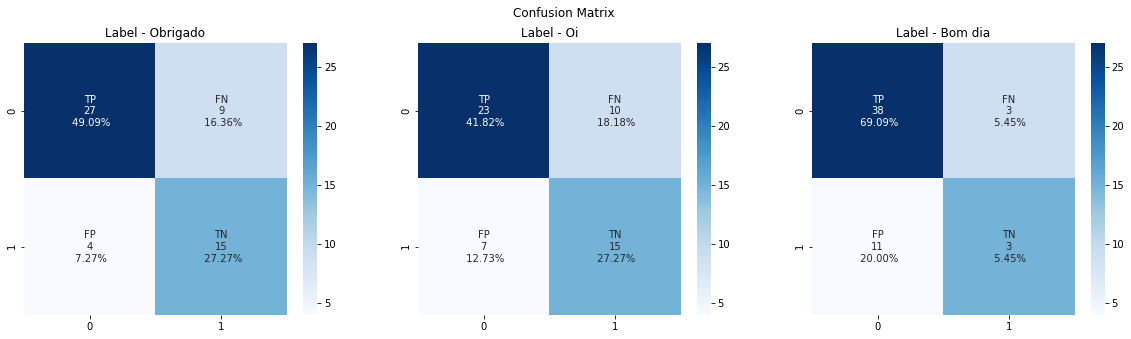

In [82]:
def evaluation_model(y_test, y_pred):

    y_test = np.argmax(y_test, axis=1).tolist()
    y_pred = np.argmax(y_pred,axis=1).tolist()

    confusion_matrix = metrics.multilabel_confusion_matrix(y_test, y_pred)

    identifiers = ['TP', 'FN', 'FP', 'TN']

    fig, axes = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle("Confusion Matrix")

    for i in range(0, len(confusion_matrix)):

        counts = ["{0:0.0f}".format(value) for value in confusion_matrix[i].flatten()]
        
        percentages = ["{0:.2%}".format(value) for value in confusion_matrix[i].flatten() / np.sum(confusion_matrix[0])]
        
        labels_confusion_matrix = [f"{identifier}\n{count}\n {percentage}" for identifier, count, percentage in zip(identifiers, counts, percentages)]
        
        labels_confusion_matrix = np.asarray(labels_confusion_matrix).reshape(2,2)
        
        sns.heatmap(confusion_matrix[0], annot=labels_confusion_matrix, fmt='', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"Label - {sign_list[i]}")
    
    print("Classification Report\n", metrics.classification_report(y_test, y_pred, target_names=sign_list, digits=3))

evaluation_model(y_test, y_pred)

### Save Model Weights

In [49]:
model.save('lstm_model_local.h5')

In [83]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

### Test Real time

In [93]:
sign_dict = {0: 'Obrigado', 1: 'Oi', 2: 'Bom dia'}
sequence_of_frames = []
predict_list = []
sentence = []
threshold = 0.5

capture = cv2.VideoCapture(-1)
output = cv2.VideoWriter('../videos/sign_recognition.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10,(640,480))

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while capture.isOpened():

        # Read image
        success, frame = capture.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # If landmark not exists, fill with zeros
        pose = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
        face = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        left_hand = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        right_hand = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

        landmarks = np.concatenate([pose, face, left_hand, right_hand])

        # Predict
        sequence_of_frames.append(landmarks)
        sequence_of_frames = sequence_of_frames[-30:] # Get last 30 frames

        if len(sequence_of_frames) == 30:
            
            predict = model.predict(np.expand_dims(sequence_of_frames, axis=0))[0] 
            predict_list.append(np.argmax(predict)) # Save predictions 
            
            if np.unique(predict_list[-1])[0] == np.argmax(predict): # Check if last predict storaged in the list is same as the last predict made above step

                if predict[np.argmax(predict)] > threshold: # Check if prediction greater then threshold
                    
                    label = sign_list[np.argmax(predict)] # Set label
                    
            image = prob_viz(predict, sign_list, image, colors)

            #cv2.putText(image, f'Sign: {label}', (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
            #    1.25, (0, 255, 0), 5)
        
        output.write(image)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    capture.release()
    cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to target thread (0x560be28bf070)

QObject::moveToThread: Current thread (0x560be28bf070) is not the object's thread (0x560be3c0f3e0).
Cannot move to tar